# Fashion MNIST Data Classification using CNN

## Step 1) Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## Step 2) Load data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
# Print the shape of data

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ['T-shirt/top', 'Trouser',	'Pullover',	'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Show image

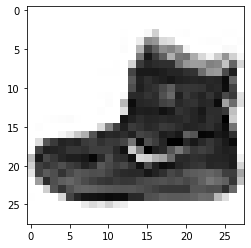

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

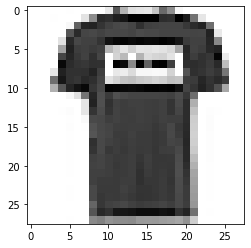

In [ ]:
plt.imshow(X_train[1], cmap='Greys')

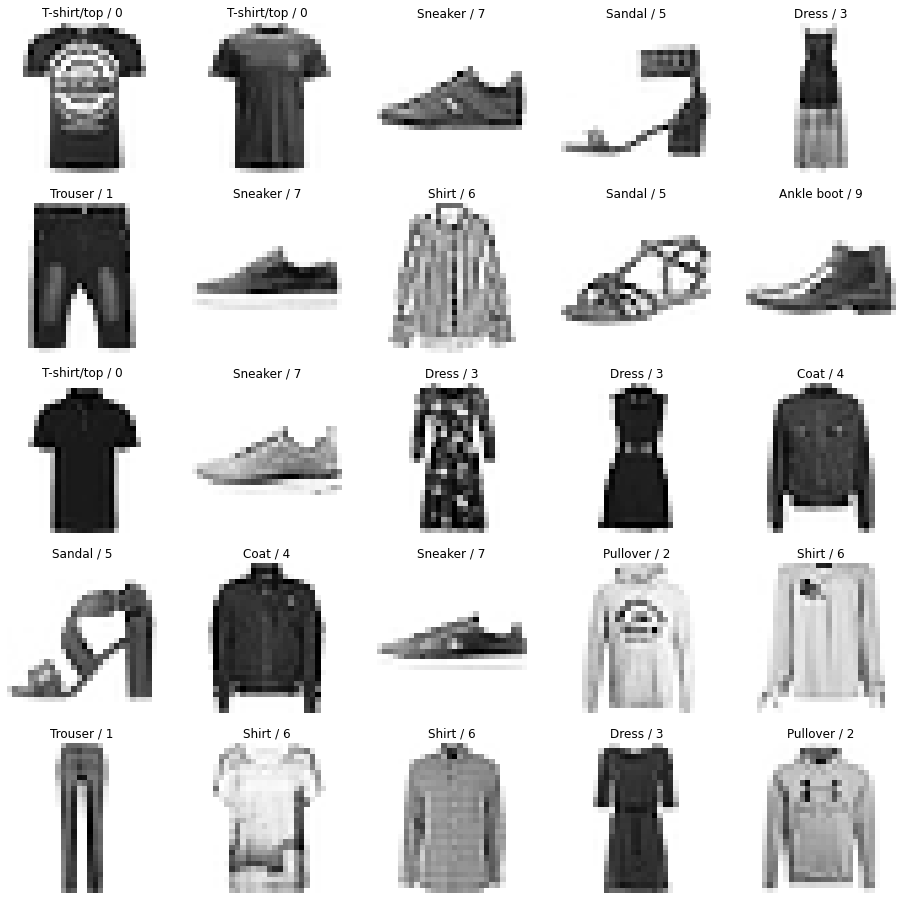

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j); j += 1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test = np.expand_dims(X_test, -1)

In [ ]:
# Feature Scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)

In [ ]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

## Step 3) Building the CNN model

In [ ]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 20s 203ms/step - loss: 0.6390 - accuracy: 0.7883 - val_loss: 0.4223 - val_accuracy: 0.8579
Epoch 2/10
94/94 [==============================] - 19s 204ms/step - loss: 0.3853 - accuracy: 0.8649 - val_loss: 0.3973 - val_accuracy: 0.8608
Epoch 3/10
94/94 [==============================] - 19s 204ms/step - loss: 0.3335 - accuracy: 0.8845 - val_loss: 0.3419 - val_accuracy: 0.8803
Epoch 4/10
94/94 [==============================] - 19s 204ms/step - loss: 0.3049 - accuracy: 0.8936 - val_loss: 0.3328 - val_accuracy: 0.8843
Epoch 5/10
94/94 [==============================] - 19s 204ms/step - loss: 0.2881 - accuracy: 0.8981 - val_loss: 0.3123 - val_accuracy: 0.8902
Epoch 6/10
94/94 [==============================] - 19s 204ms/step - loss: 0.2659 - accuracy: 0.9059 - val_loss: 0.3057 - val_accuracy: 0.8938
Epoch 7/10
94/94 [==============================] - 19s 204ms/step - loss: 0.2517 - accuracy: 0.9108 - val_loss: 0.2889 - val_accuracy: 0.8988

## Step 4) Testing and evaluation

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.11, 0.03, 0.01]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2807 - accuracy: 0.8965


[0.28069713711738586, 0.8964999914169312]

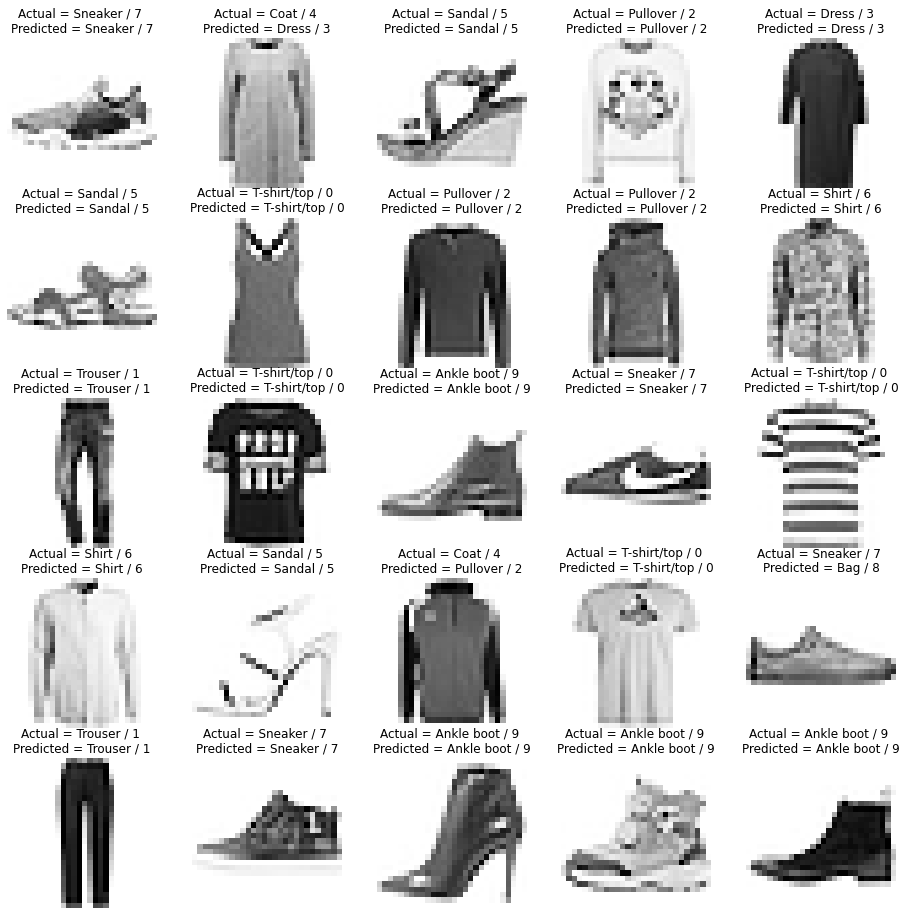

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j); j += 1
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

In [ ]:
""" ## Confusion Matrix """

' ## Confusion Matrix '

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.79      0.88      0.83      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.85      0.82      0.83      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.74      0.68      0.71      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



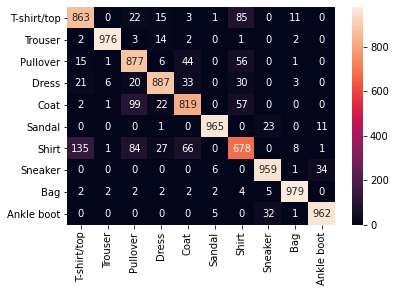

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
"""# Save Model"""

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

## Build complex CNN

In [ ]:
# Building CNN model
cnn_model2 = keras.models.Sequential([
                                      keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 27s 278ms/step - loss: 0.8599 - accuracy: 0.6796 - val_loss: 0.4821 - val_accuracy: 0.8217
Epoch 2/20
94/94 [==============================] - 26s 277ms/step - loss: 0.4612 - accuracy: 0.8345 - val_loss: 0.3975 - val_accuracy: 0.8575
Epoch 3/20
94/94 [==============================] - 26s 278ms/step - loss: 0.3796 - accuracy: 0.8655 - val_loss: 0.3488 - val_accuracy: 0.8736
Epoch 4/20
94/94 [==============================] - 26s 277ms/step - loss: 0.3393 - accuracy: 0.8781 - val_loss: 0.3194 - val_accuracy: 0.8859
Epoch 5/20
94/94 [==============================] - 26s 279ms/step - loss: 0.3098 - accuracy: 0.8869 - val_loss: 0.2919 - val_accuracy: 0.8962
Epoch 6/20
94/94 [==============================] - 26s 278ms/step - loss: 0.2839 - accuracy: 0.8975 - val_loss: 0.2774 - val_accuracy: 0.8988
Epoch 7/20
94/94 [==============================] - 26s 277ms/step - loss: 0.2668 - accuracy: 0.9021 - val_loss: 0.2704 - val_accuracy: 0.9033